# Exploring Why Civil Resistance Works

For more than a century, from 1900 to 2006, campaigns of nonviolent resistance were more than twice as effective as their violent counterparts in achieving their stated goals. By attracting impressive support from citizens, whose activism takes the form of protests, boycotts, civil disobedience, and other forms of nonviolent noncooperation, these efforts help separate regimes from their main sources of power and produce remarkable results, even in Iran, Burma, the Philippines, and the Palestinian Territories.

In this report, some of the findings of this research done by [Erical Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan will be replicated. The results of the reseach were then published as a book with the name [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw)

You can find the data at <https://www.ericachenoweth.com/wp-content/uploads/2012/01/Data-and-Replication-Files-3.zip> and data documentation at <https://www.ericachenoweth.com/wp-content/uploads/2019/07/WCRW-Appendix.pdf>.

---

> Ioannis (Ion) Petropoulos, 8160107 <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> ionpetro@gmail.com

Firstly, we import the python libraries needed for the data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In order to read the data, place them on a folder **data**

In [2]:
filepath = 'data/WCRWreplication.dta'
data = pd.read_stata(filepath)

The dataset consists of 323 rows and 85 columns.

In [3]:
data.shape

(323, 85)

## Frequency of nonviolent and violent campaigns

We will replicate a plot included in the book, where we can observe the number of nonviolent and violent campaigns that took place globally over the decades  

In [4]:
#group by end year and violent indicator
violgroup = data.groupby(['eyear', 'viol']).count()
violgroup.reset_index(inplace=True)
violgroup = violgroup.iloc[:, 0:3]
violgroup.rename(columns={'defect' : 'counter'}, inplace=True)
violgroup.head()

,eyear,viol,counter
0,1902,1,2
1,1903,1,3
2,1904,1,1
3,1905,1,2
4,1906,1,3


We only need to use the violent column, where 1 indicates violent campaigns and 0 indicated inviolent (civil) ones.

In [5]:
violent = violgroup.loc[violgroup.viol == 1]
nonviolent = violgroup.loc[violgroup.viol == 0]

In [6]:
nonviolent.head()

,eyear,viol,counter
11,1919,0,1
16,1923,0,1
23,1931,0,1
30,1944,0,4
32,1945,0,1


We groupby the decade the years belong to for each campaign type

In [7]:
violdec = violent.groupby((violent.eyear//10)*10).sum()
nonvioldec = nonviolent.groupby((nonviolent.eyear//10)*10).sum()
nonvioldec.iloc[:, 1:3].head()

,viol,counter
eyear,,
1910,0,1
1920,0,1
1930,0,1
1940,0,5
1950,0,9


We observe that there are no data for the 1900 - 1910 decade, thus we have to insert it hardwritten.

In [8]:
nonv = np.insert(nonvioldec.counter.values, 0, 0)

We can now create the plot

Text(0, 0.5, 'campaigns')

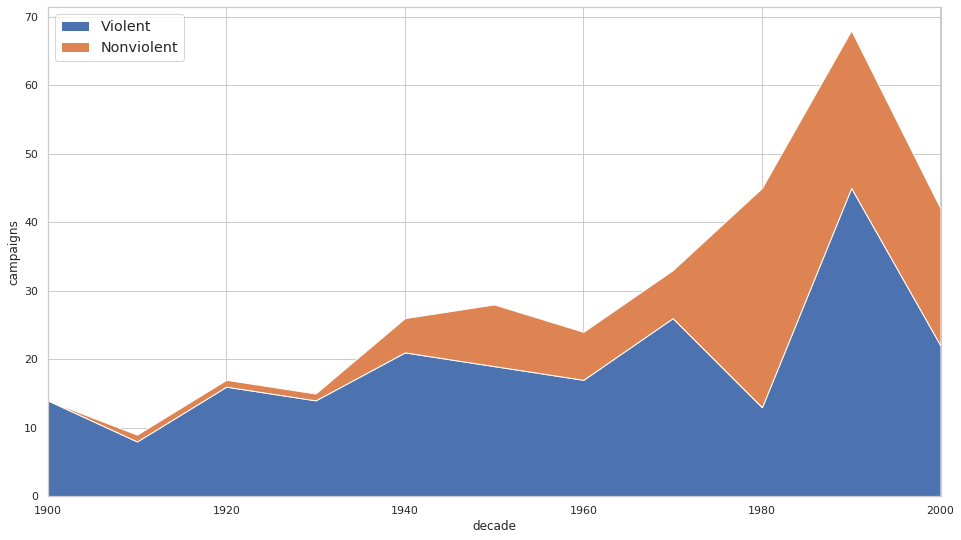

In [9]:
sns.set(style="whitegrid")
v = violdec.counter.values
plt.figure(figsize=(16,9))
plt.stackplot(violdec.index, v, nonv, labels=['Violent', 'Nonviolent'])
plt.legend(loc='upper left', fontsize = 'large')
plt.xlim(1900, 2000)
plt.xlabel('decade')
plt.ylabel('campaigns')

Let's now create the original plot of the book, where the outcome is clearer 

Text(0, 0.5, 'campaigns')

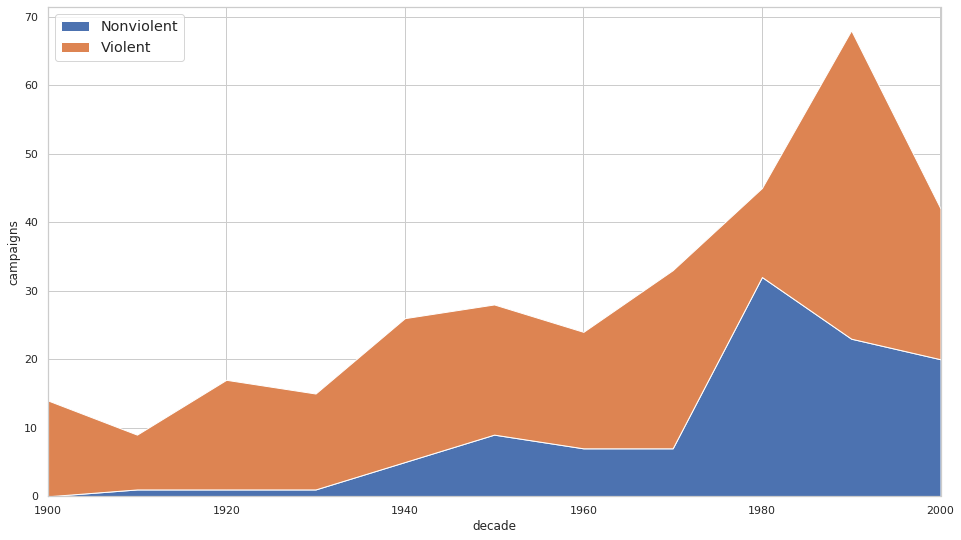

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,9))
plt.stackplot(violdec.index, nonv, v, labels=['Nonviolent', 'Violent'])
plt.legend(loc='upper left', fontsize = 'large')
plt.xlim(1900, 2000)
plt.xlabel('decade')
plt.ylabel('campaigns')

From the plot above, we can clearly observe that:

* There is an increasing number of civil campaigns as time progresses
* Till 1930, there were almost no civil campaigns on a global basis

##  Number of Nonviolent Campaigns and Percentage of Success

We will now attempt to create a plot showing the percentage of success of nonviolent resistances over time. We will only include data after 1940s

A campaign is considered successful, when the outcome column is marked with 5

In [11]:
non = data.loc[(data.viol == 0) & (data.outcome == 5)]
group = non.groupby('eyear').count()
group.reset_index(inplace=True)
#group by each decade
groupdec = group.groupby((group.eyear//10)*10).sum()
groupdec.iloc[3:6, 2:3]

,outcome
eyear,
1950,3
1960,3
1970,4


The percentage of success equals to:

$$\text{Percentage of Success} = \frac{\text{Number of successful nonviolent campaigns}}{\text{Total number of nonviolent campains}}$$

In [68]:
perc = groupdec.outcome/nonvioldec.counter

In [74]:
# get the values from 1940 and after
y2 = perc[3:]
y2

eyear
1940    0.400000
1950    0.333333
1960    0.428571
1970    0.571429
1980    0.531250
1990    0.521739
2000    0.700000
dtype: float64

We can now draw the plot

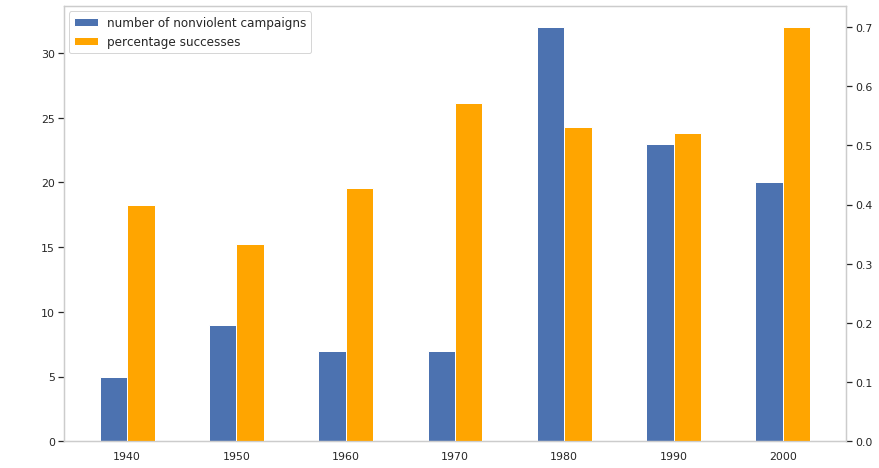

In [75]:
width = 2.5  # the width of the bars
# get the values from 1940 and after
x = nonvioldec.index[3:]
y1 = nonvioldec.counter.values[3:]
fig = plt.figure(figsize=[14,8])
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
number = ax1.bar(x - width/2, y1, width, color='b', label='number of nonviolent campaigns')
ax1.grid(False)
percentage = ax2.bar(x + width/2, y2, width, color='orange', label='percentage successes')
ax2.grid(False)
fig.legend(bbox_to_anchor=(0.0623, 0.803), loc='upper left', fontsize=12)

Non violent resistance became twice as effective from 1940 to 2000 reaching 70% success rate. 

## Success rate per decade

Let's now summarize the result by ploting both the nonviolent and violent campains and comparing the rates

We have to do the same thing as before, but now for the violent insurgencies

In [90]:
vio = data.loc[(data.viol == 1) & (data.outcome == 5)]
group = vio.groupby('eyear').count()
group.reset_index(inplace=True)
groupdec2 = group.groupby((group.eyear//10)*10).sum()
groupdec2.iloc[3:6, 2:3]

,outcome
eyear,
1930,2
1940,7
1950,7


Calculate the violent percentage

In [85]:
vioperc = groupdec2.outcome/violdec.counter

In [92]:
x = vioperc.index[4:]
y1 = vioperc[4:]
# get all except the first 3 since there are no data for 1900
y2 = perc[3:]
y1

eyear
1940    0.333333
1950    0.368421
1960    0.235294
1970    0.384615
1980    0.384615
1990    0.266667
2000    0.136364
dtype: float64

Let's plot!

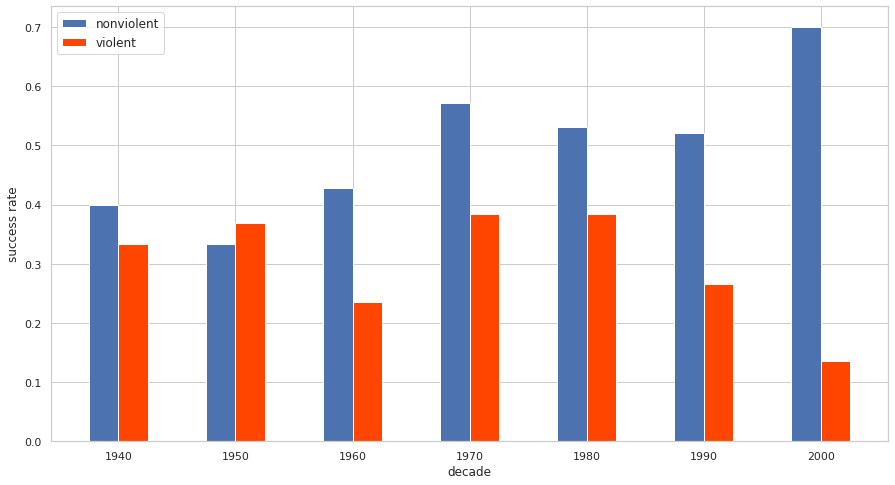

In [93]:
width = 2.5  # the width of the bars

fig = plt.figure(figsize=[15,8])
ax = fig.add_subplot(111)
b2 = ax.bar(x + width/2, y1, width, color='orangered')
b1 = ax.bar(x - width/2, y2, width, color='b')

plt.xlabel('decade')
plt.ylabel('success rate')
ax.legend((b1[0], b2[0]), ('nonviolent', 'violent'), fontsize=12)


According to the diagram above, we can easily assume that the success rate of non violent campaignes has been increasing over time and the rate of failure for violent campaignes has also been increasing.

So maybe civil resistance can be used at almost any context. Anywere where violent resistance is possible, non violent resistance is also probablypossible! 

## Question 4

Create a table with the twenty-five largest resistance campaigns, for all years, based on their number of members at highest point (peak membership). The table should include the membership, the start year, the end year, the location, the target, whether it was violent or not, and whether it was successful or not. Notice if you find anything about Greece.

In [20]:
peakcamp = data.loc[:, ['peakmembership', 'eyear', 'byear', 'location', 'target']]

peakcamp.sort_values(by='peakmembership', ascending=False)[:25]

,peakmembership,eyear,byear,location,target
257,4500000.0,1945,1937,China,Japanese occupation
206,2000000.0,1979,1977,Iran,Shah Reza Pahlavi
311,2000000.0,1983,1986,Philippines,Ferdinand Marcos
289,1000000.0,1988,1988,Burma,military junta
265,1000000.0,1989,1989,China,Communist regime
262,1000000.0,1968,1967,China,anti-Maoists
255,1000000.0,1949,1922,China,Kuomintang regime
10,1000000.0,2006,2006,Mexico,Calderon regime
228,1000000.0,2005,2005,Lebanon,Syrian forces
141,1000000.0,1999,1993,Nigeria,Military rule


## Question 5

Examine the effect of participation on the probability of campaign success. You should run a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends. Explain your results.

Having done that, create a scatter plot showing the logged participants per capita, on the 𝑥
axis, and the probability of success, on the 𝑦 axis. 

In [21]:
clear_data = data.loc[data.mempc.notna()]

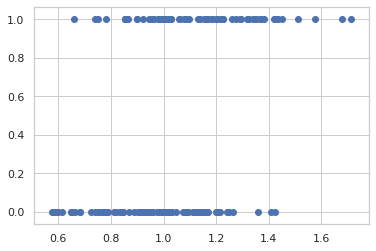

In [22]:
plt.scatter(data.mempc, data.success)

Let's explore our target value and visualize it

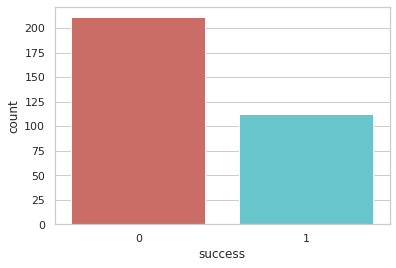

In [23]:
data.success.value_counts()
sns.countplot(x = 'success', data = data, palette = 'hls')
plt.show()

We apply binary logistic regression since the dependent variable is binary.

In [24]:
from statsmodels.formula.api import logit

success_mod = logit("success ~ mempc + lnpop", clear_data).fit()
success_mod.summary2()

Optimization terminated successfully.
         Current function value: 0.594790
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.129     
Dependent Variable: success          AIC:              199.9014  
Date:               2019-11-24 21:04 BIC:              209.1827  
No. Observations:   163              Log-Likelihood:   -96.951   
Df Model:           2                LL-Null:          -111.35   
Df Residuals:       160              LLR p-value:      5.5508e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -5.8199    1.9207  -3.0301  0.0024  -9.5843  -2.0555
mempc          4.4892    0.9857   4.5545  0.0000   2.5573   6.4210
lnpop          0.0907    0.1285   0.7058  0.4803  -0.1612   0.3426
=================================================================

"""

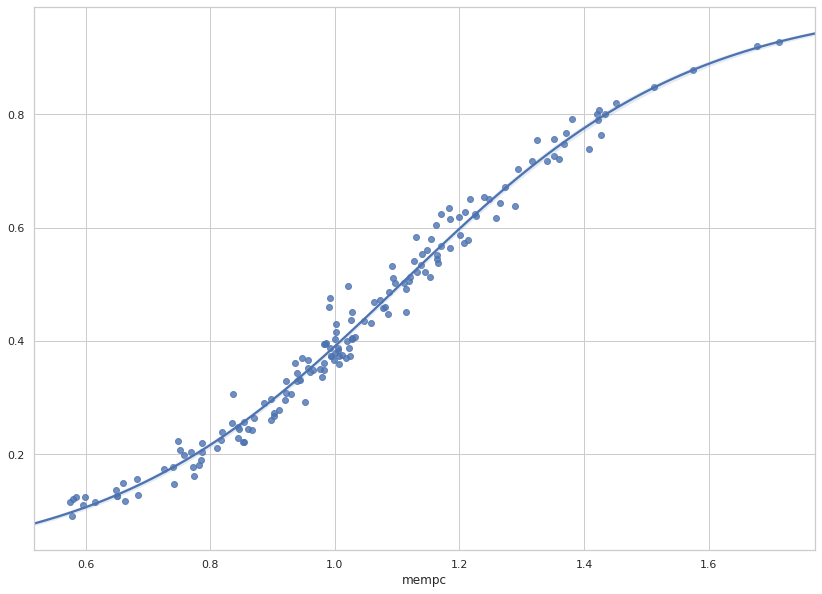

In [25]:
X = clear_data[['mempc' , 'lnpop']]
y = success_mod.predict(X)
x = X.iloc[:, 0]
plt.figure(figsize=[14,10])
# plt.scatter(x,y)
sns.regplot(x, y, data=data, logistic=True)

The intercept is the log odds of succeding when all the independent variables are held at zero; that is . That means that 

In [26]:
import math

In [27]:
0.002/1.002

0.001996007984031936

In [28]:
math.exp(-5.8199)

0.0029679019201339445

In [29]:
math.exp(-4.48)

0.011333413154667387

Here I have to explain what I see

Explain the result due to the mathematical typo

* That means that the logistic regression model is:

$$ log\frac{p}{1 - p}  = \beta_0 + \beta_1 x$$

* And we have, solving for $p(x)$:

$$ p(x) = \frac {1}{1+e^{-(\beta_0 + \beta_1 x)}} $$

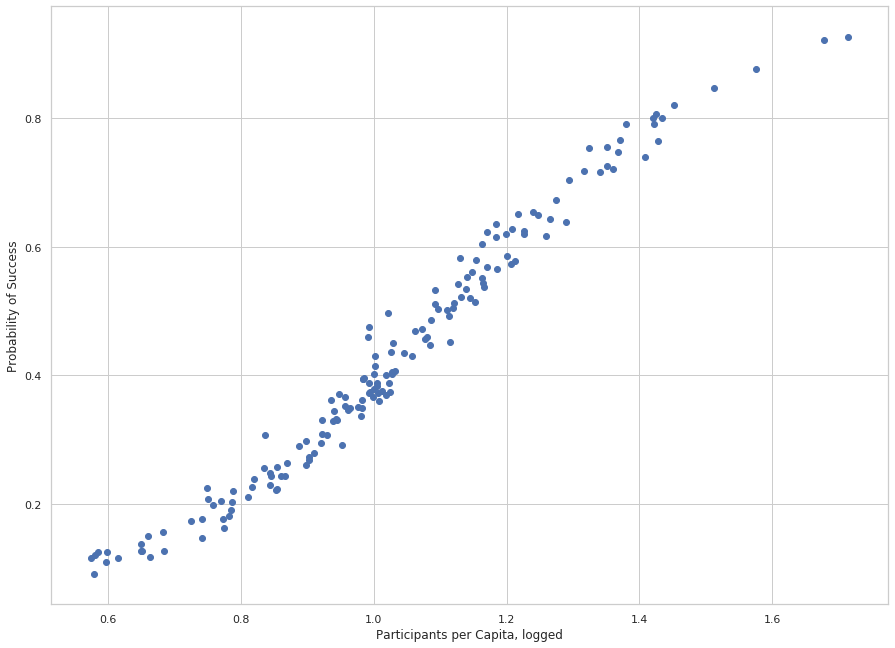

In [30]:
# y = 1 / (1 + np.exp(-x))

x = clear_data.mempc
y = 1/(1+ np.exp(-success_mod.fittedvalues))
fig = plt.figure(figsize=[15,11])
ax = fig.subplots()
ax.set_xlabel('Participants per Capita, logged')
ax.set_ylabel('Probability of Success')
ax.scatter(x,y)

In [31]:
10**data.mempc.max()

51.75073712346991

In [32]:
#we have 160 records with missing values
data.mempc.isnull().sum()

160

We can calculate the probability of success beforehand

In [33]:
data.success.sum()/data.success.count()

0.34674922600619196

### QUESTION 6

From the results you obtained in the previous question, find the percentage of the population that is the tipping point for success in a campaign.

Since we want to calculate the percentage of the population that is the tipping point for success, we can turn this question into a classification problem. In this problem, we are looking to classify the percentage of populations (mempc) to either successfull of not. 

After that, we have to conclude to a threshold that always classifies the non successful campaigns correctly.

In other words, I am looking for a high threshold with **0 False Positives** and **maximum True Positives**. Note here that a high threshold:

* Decreases the number of False Possitives (that's what I want)
* Increases the number of False Negatives (I don't care If I classify a campaign as no successful and in the end it was successful)

Thus, we will do a Logistic Regression with sklearn in order to find the ROC curve

In [34]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

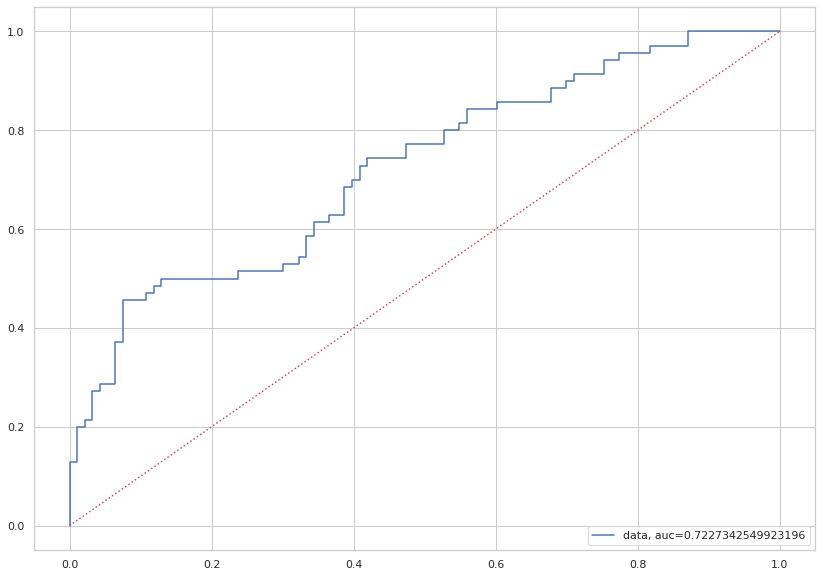

In [35]:
y_pred_proba = success_mod.predict()
fpr, tpr, thresholds = metrics.roc_curve(clear_data.success,  success_mod.predict(X))
auc = metrics.roc_auc_score(clear_data.success, success_mod.predict(X))
plt.figure(figsize=[14,10])
plt.plot(fpr,tpr,label="data, auc="+str(auc))
z = np.linspace(0, 1, 1000)
plt.plot(z, z, ':r')
plt.legend(loc=4)
plt.show()

In [36]:
frame = { 'fpr': fpr, 'tpr': tpr, 'thresholds' : thresholds }

In [37]:
results = pd.DataFrame(frame)

In [38]:
results

,fpr,tpr,thresholds
0,0.000000,0.000000,1.927019
1,0.000000,0.014286,0.927019
2,0.000000,0.128571,0.791073
3,0.010753,0.128571,0.790409
4,0.010753,0.200000,0.747059
...,...,...,...
61,0.817204,0.957143,0.189858
62,0.817204,0.971429,0.181065
63,0.870968,0.971429,0.155638
64,0.870968,1.000000,0.146914


In [39]:
result = results.loc[results.fpr == 0]

In [40]:
result = result.loc[result.tpr == result.tpr.max()]

In [41]:
newThresh = result[['thresholds']].values

So the threshold is 1.92 or 0.92 since threshold adds 1 to the first value of the array. So back to the S curve diagram...

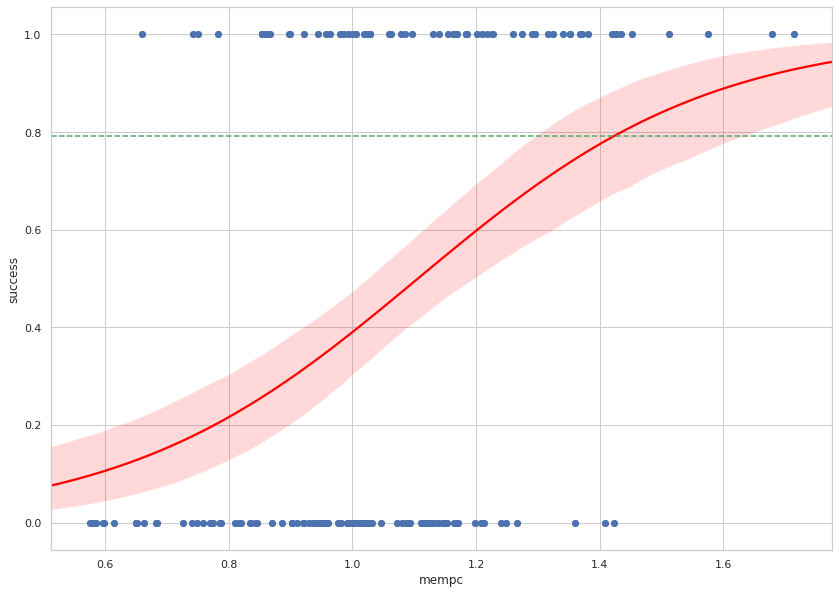

In [42]:
X = clear_data[['mempc' , 'lnpop']]
y = clear_data.success
x = X.iloc[:, 0]
plt.figure(figsize=[14,10])
plt.scatter(x,y)
sns.regplot(x, y, line_kws={'color': 'red'},data=data, logistic=True)
plt.axhline(y=newThresh, color='g', linestyle='--')

We can't use data with missing values, so we drop them.

In [43]:
clear_data = data.loc[data.mempc.notna()]

The regression will have as independant variables **mempc** and **lnpop** and as binary dependant variable **success**

In [44]:
X = clear_data[['mempc' , 'lnpop']]
y = clear_data.success
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [45]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

/home/ion/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

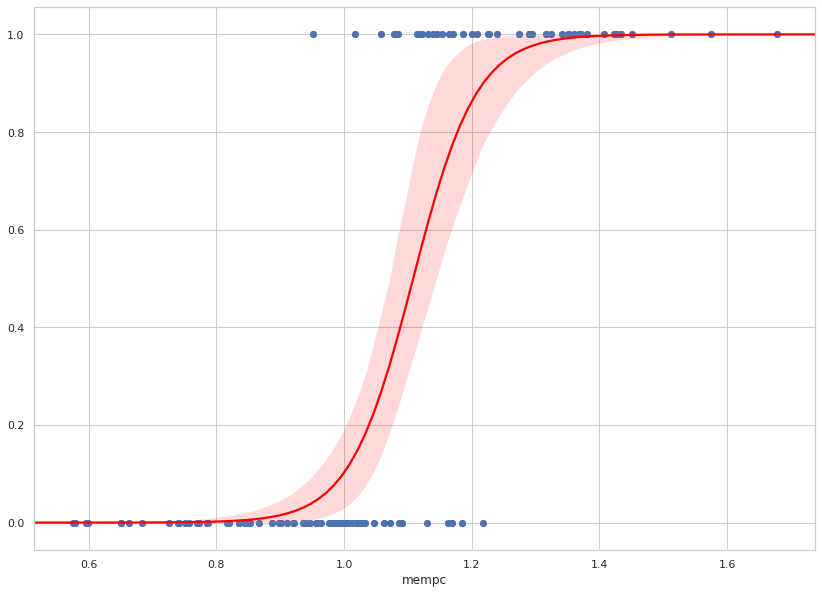

In [46]:
y = clf.predict(X_train)
x = X_train.iloc[:, 0]
plt.figure(figsize=[14,10])
plt.scatter(x,y)
sns.regplot(x, y, line_kws={'color': 'red'},data=data, logistic=True)

In [47]:
y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[21,  9],
       [13,  6]])

Text(0.5, 257.44, 'Predicted label')

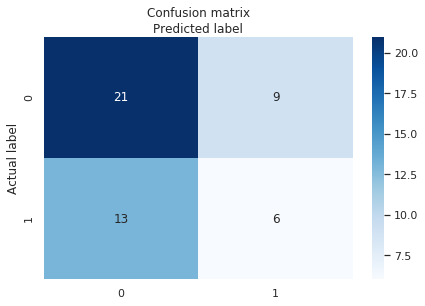

In [48]:
fig, ax = plt.subplots()
class_names = ['success', 'no success']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5510204081632653
Precision: 0.4
Recall: 0.3157894736842105


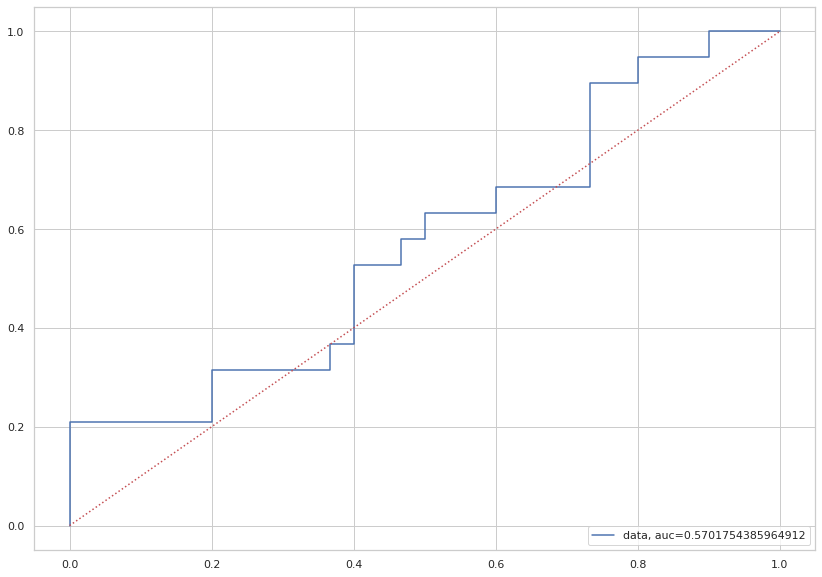

In [50]:
y_pred_proba = clf.predict_proba(X_test)[::, 1]
# y_pred_proba
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=[14,10])
plt.plot(fpr,tpr,label="data, auc="+str(auc))
z = np.linspace(0, 1, 1000)
plt.plot(z, z, ':r')
plt.legend(loc=4)
plt.show()

In [51]:
thresholds.max()

1.8319327617365981

The **ROC** graph summarizes all of the confusion matrices that each threshold produced

In [52]:
thresholds

array([1.83193276, 0.83193276, 0.64814451, 0.57455531, 0.53130392,
       0.48494849, 0.4785125 , 0.46629097, 0.44887535, 0.43381985,
       0.43353797, 0.42937914, 0.42398353, 0.41129393, 0.40113737,
       0.39336492, 0.3639317 , 0.35041862, 0.33634864, 0.20031883,
       0.18295636, 0.12964225])

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [55]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

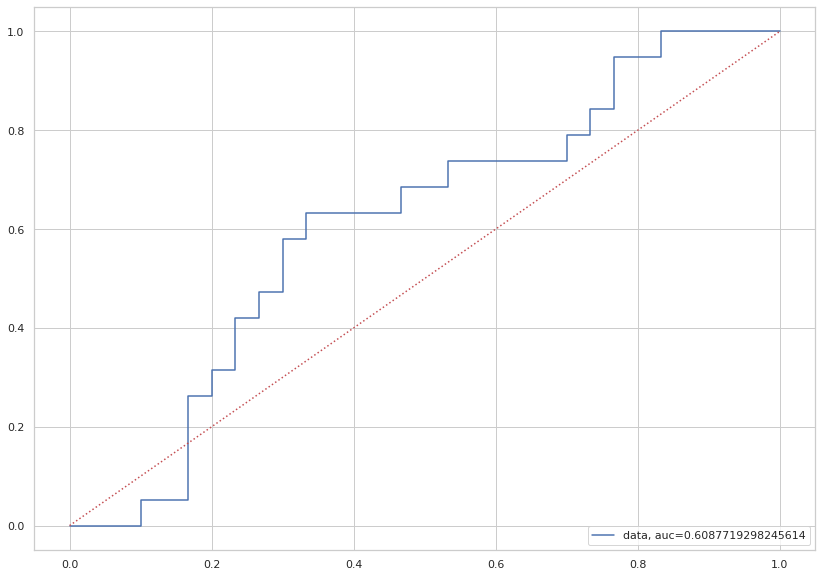

In [56]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=[14,10])
plt.plot(fpr,tpr,label="data, auc="+str(auc))
z = np.linspace(0, 1, 1000)
plt.plot(z, z, ':r')
plt.legend(loc=4)
plt.show()

In [57]:
thresholds

array([1.81306159, 0.81306159, 0.72404072, 0.71739992, 0.7154996 ,
       0.67901486, 0.58204862, 0.52423138, 0.51126987, 0.47516129,
       0.47159471, 0.4715705 , 0.46855872, 0.43055979, 0.42309555,
       0.42050296, 0.41146306, 0.40844753, 0.40521676, 0.39985176,
       0.35211256, 0.35115027, 0.34175595, 0.33969236, 0.32762414,
       0.28673963, 0.24961495, 0.2304925 , 0.17510109, 0.16538512])

## Question 7

In [58]:
success_mod = logit("success ~ nonviol + tpolity + lnpop + lmembers", clear_data).fit()
success_mod.summary2()

Optimization terminated successfully.
         Current function value: 0.567143
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.163     
Dependent Variable: success          AIC:              169.9344  
Date:               2019-11-24 21:04 BIC:              184.6782  
No. Observations:   141              Log-Likelihood:   -79.967   
Df Model:           4                LL-Null:          -95.506   
Df Residuals:       136              LLR p-value:      2.9528e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.1085    1.4130  -0.0768  0.9388  -2.8779   2.6609
nonviol        0.9048    0.4636   1.9517  0.0510  -0.0038   1.8134
tpolity        0.0520    0.0298   1.7439  0.0812  -0.0064   0.1104
lnpop         -0.4363    0.1423  -3.0671  0.0022  -0.7151  -0.1575
lmembers       0.3751    0.1282   2.9264  0.0034   0.1239   0.6263
=================================================================

"""

In [59]:
success_mod = logit("success ~ nonviol + americas + asia + africa + europe + fsu + middleeast", data).fit()
success_mod.summary2()

Optimization terminated successfully.
         Current function value: 0.591713
         Iterations 5


/home/ion/.local/lib/python3.6/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/home/ion/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/ion/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/ion/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.083     
Dependent Variable: success          AIC:              396.2465  
Date:               2019-11-24 21:04 BIC:              422.6901  
No. Observations:   323              Log-Likelihood:   -191.12   
Df Model:           6                LL-Null:          -208.47   
Df Residuals:       316              LLR p-value:      4.9505e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    -0.9785        nan      nan      nan      nan      nan
nonviol       1.2582     0.2648   4.7515   0.0000   0.7392   1.7771
americas      0.3016        nan      nan      nan      nan      nan
asia         -0.4977        nan      nan      nan      nan      nan
africa        0.2647        nan      nan      nan      nan      nan
europe       -0.2938        nan      nan      nan      nan      nan
fsu           0.0056        nan      nan      nan      nan      nan
middleeast   -0.7589        nan      nan      nan      nan      nan
=================================================================

"""